Libraries

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

Histogram

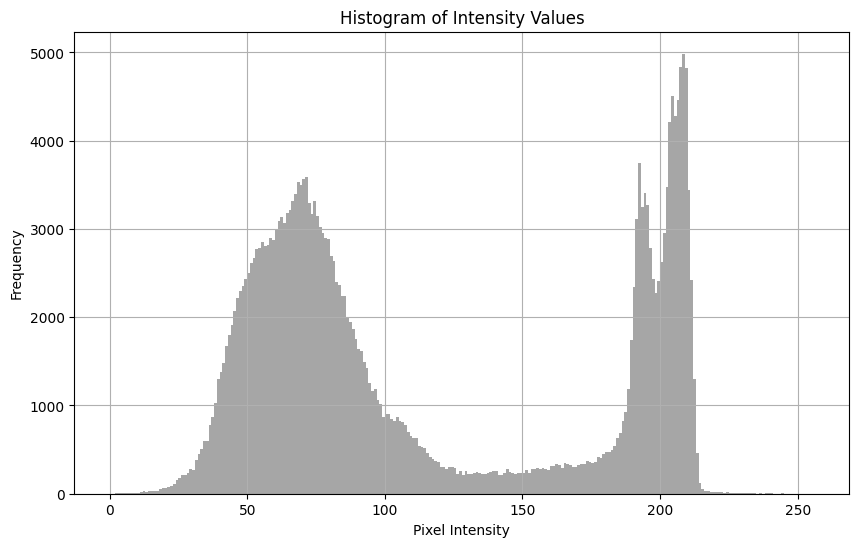

In [2]:
# Histogram of intensity values in the image

img_path = 'D:\Onedrive\experiments\experiments\image_processing\cute_dog.jpg'
img = cv2.imread(img_path)
# cv2.imshow('frame', img)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Flatten the image array to 1D (to get intensity values)
intensity_values = img_gray.flatten()

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(intensity_values, bins=256, range=(0, 256), color='gray', alpha=0.7)
plt.title('Histogram of Intensity Values')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency') # number of pixels having the respective intensity
plt.grid(True)
plt.show()


Histogram Equalization

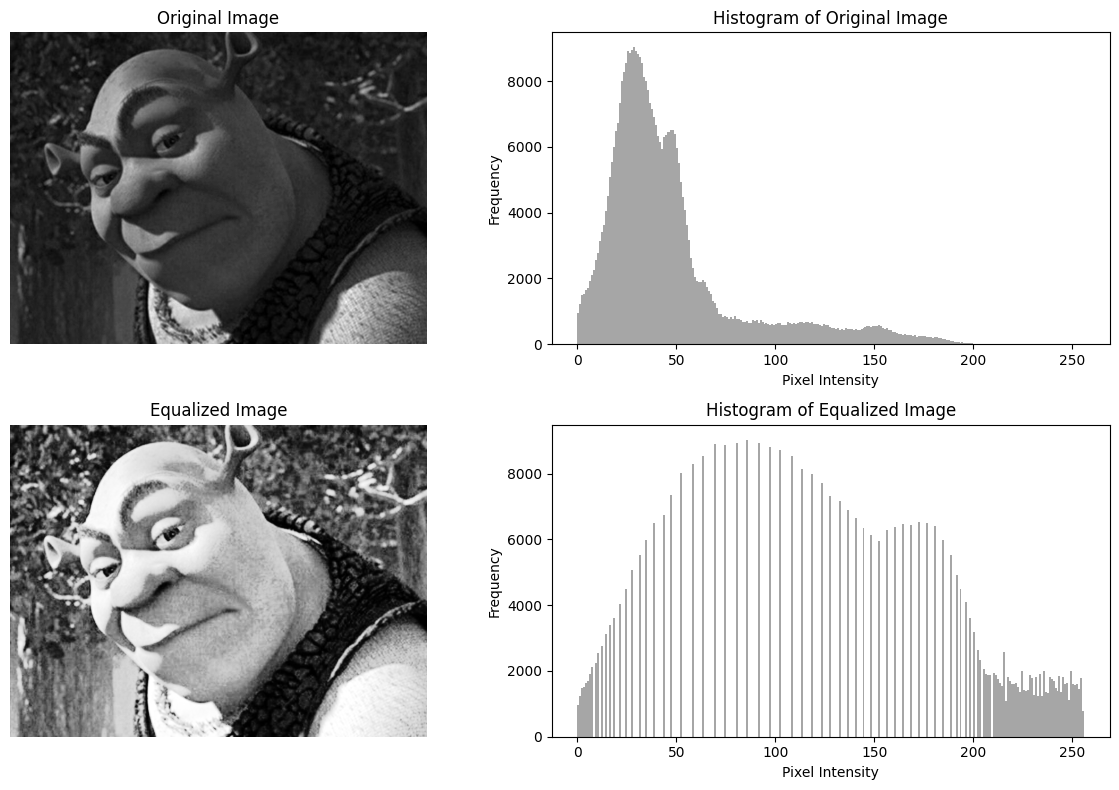

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img_path = 'D:\Onedrive\experiments\experiments\image_processing\shrek.jpg'
# Load the grayscale image
image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

# Apply histogram equalization
equalized_image = cv2.equalizeHist(image)

# Create subplots
fig, ax = plt.subplots(2, 2, figsize=(12, 8))

# Plot the original grayscale image
ax[0, 0].imshow(image, cmap='gray')
ax[0, 0].set_title('Original Image')
ax[0, 0].axis('off')

# Plot the histogram of the original image
ax[0, 1].hist(image.flatten(), bins=256, range=(0, 256), color='gray', alpha=0.7)
ax[0, 1].set_title('Histogram of Original Image')
ax[0, 1].set_xlabel('Pixel Intensity')
ax[0, 1].set_ylabel('Frequency')

# Plot the equalized image
ax[1, 0].imshow(equalized_image, cmap='gray')
ax[1, 0].set_title('Equalized Image')
ax[1, 0].axis('off')

# Plot the histogram of the equalized image
ax[1, 1].hist(equalized_image.flatten(), bins=256, range=(0, 256), color='gray', alpha=0.7)
ax[1, 1].set_title('Histogram of Equalized Image')
ax[1, 1].set_xlabel('Pixel Intensity')
ax[1, 1].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()


Contrastive Limited Adaptive Histogram Equalization (CLAHE)
(used in situations where global histogram equalization does not help)

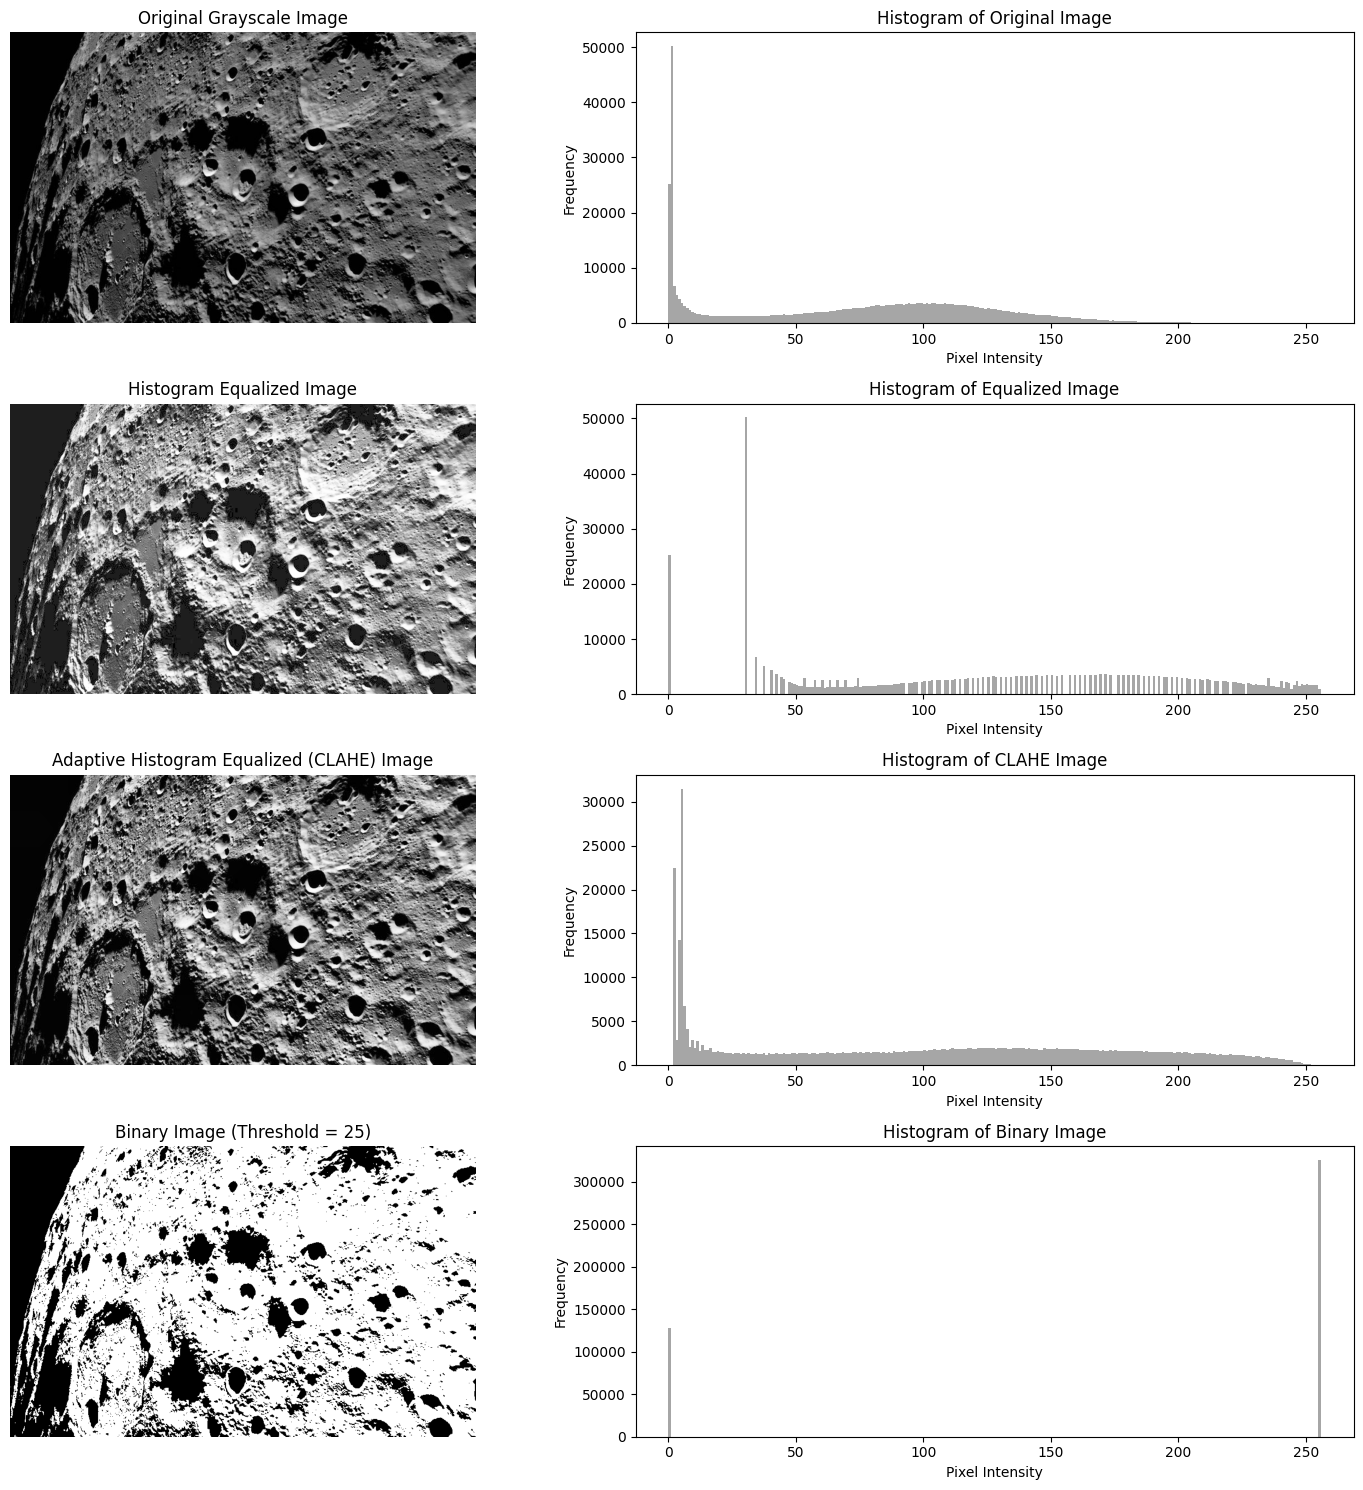

In [4]:
# 1) Image Division
# 2) Local Histogram Equalization
# 3) Interpolation (to smoothly transition at boundaries of each local division)
# 4) Clipping (to ensure noise does not get over-amplified)

img_path = 'D:\\Onedrive\\experiments\\experiments\\image_processing\\lunar_surface.jpg'

# Load the grayscale image
image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

# Apply global histogram equalization
hist_eq_image = cv2.equalizeHist(image)

# Create a CLAHE object (adaptive histogram equalization)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
clahe_image = clahe.apply(image)

# Apply threshold to create a binary image
threshold_value = 25
_, binary_image = cv2.threshold(image, threshold_value, 255, cv2.THRESH_BINARY)

# Create subplots
fig, ax = plt.subplots(4, 2, figsize=(15, 15))

# Original grayscale image
ax[0, 0].imshow(image, cmap='gray')
ax[0, 0].set_title('Original Grayscale Image')
ax[0, 0].axis('off')

# Histogram of the original grayscale image
ax[0, 1].hist(image.flatten(), bins=256, range=(0, 256), color='gray', alpha=0.7)
ax[0, 1].set_title('Histogram of Original Image')
ax[0, 1].set_xlabel('Pixel Intensity')
ax[0, 1].set_ylabel('Frequency')

# Histogram-equalized image
ax[1, 0].imshow(hist_eq_image, cmap='gray')
ax[1, 0].set_title('Histogram Equalized Image')
ax[1, 0].axis('off')

# Histogram of the histogram-equalized image
ax[1, 1].hist(hist_eq_image.flatten(), bins=256, range=(0, 256), color='gray', alpha=0.7)
ax[1, 1].set_title('Histogram of Equalized Image')
ax[1, 1].set_xlabel('Pixel Intensity')
ax[1, 1].set_ylabel('Frequency')

# Adaptive histogram equalization (CLAHE) image
ax[2, 0].imshow(clahe_image, cmap='gray')
ax[2, 0].set_title('Adaptive Histogram Equalized (CLAHE) Image')
ax[2, 0].axis('off')

# Histogram of the CLAHE image
ax[2, 1].hist(clahe_image.flatten(), bins=256, range=(0, 256), color='gray', alpha=0.7)
ax[2, 1].set_title('Histogram of CLAHE Image')
ax[2, 1].set_xlabel('Pixel Intensity')
ax[2, 1].set_ylabel('Frequency')

# Binary image
ax[3, 0].imshow(binary_image, cmap='gray')
ax[3, 0].set_title('Binary Image (Threshold = 25)')
ax[3, 0].axis('off')

# Histogram of the binary image
ax[3, 1].hist(binary_image.flatten(), bins=256, range=(0, 256), color='gray', alpha=0.7)
ax[3, 1].set_title('Histogram of Binary Image')
ax[3, 1].set_xlabel('Pixel Intensity')
ax[3, 1].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

Apple Counting Experiments

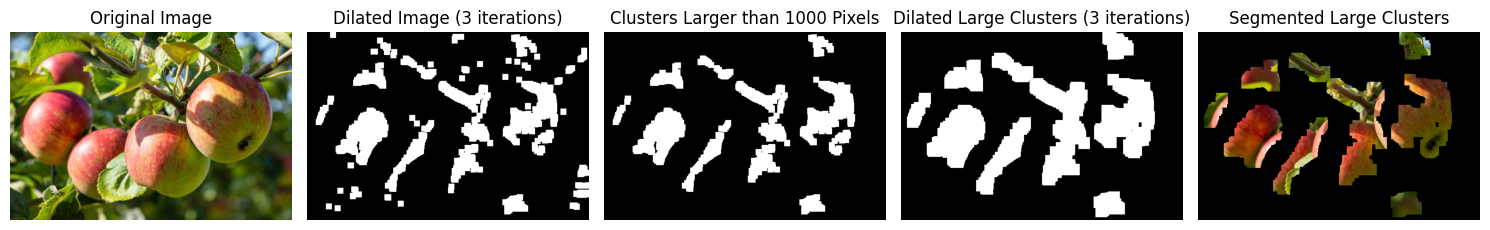

In [58]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Define the image path
img_path = 'D:/Onedrive/experiments/experiments/image_processing/five_apples.jpg'

# Load the image in color (BGR format as OpenCV default)
img = cv2.imread(img_path)

# Check if the image is loaded correctly
if img is None:
    print("Error: Image not loaded correctly. Check the file path.")
else:
    # Convert from BGR to RGB (since OpenCV loads images in BGR format)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Split the image into its Red, Green, and Blue channels
    r_channel, g_channel, b_channel = cv2.split(img_rgb)

    # Create a CLAHE object for applying CLAHE on each channel
    clahe = cv2.createCLAHE(clipLimit=0.5, tileGridSize=(8, 8))

    # Apply CLAHE to each of the Red, Green, and Blue channels
    r_clahe = clahe.apply(r_channel)
    g_clahe = clahe.apply(g_channel)
    b_clahe = clahe.apply(b_channel)

    # Merge the CLAHE-adjusted channels back into an RGB image
    img_clahe_rgb = cv2.merge([r_clahe, g_clahe, b_clahe])

    # Define thresholds for Red, Green, and Blue channels for segmentation
    lower_bound = np.array([60, 0, 0])  # Lower bound for RGB (apples are red)
    upper_bound = np.array([255, 60, 20])  # Upper bound for RGB

    # Create a mask based on the defined thresholds
    mask = cv2.inRange(img_clahe_rgb, lower_bound, upper_bound)

    # Convert mask to binary (already in binary due to inRange)
    binary_image = mask

    # Define a kernel for dilation and erosion
    kernel = np.ones((5, 5), np.uint8)

    # Step 1: Apply dilation for 3 iterations to the binary image
    dilated_image = cv2.dilate(binary_image, kernel, iterations=3)

    # Step 2: Perform connected components (clustering) after dilation
    num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(dilated_image, connectivity=8)

    # Step 3: Set a threshold for the size of clusters (e.g., 500 pixels)
    size_threshold = 1000  # You can adjust this value based on your image

    # Step 4: Create a new mask to keep only large clusters
    large_clusters_mask = np.zeros_like(binary_image)
    for i in range(1, num_labels):  # Start from 1 to skip the background (label 0)
        if stats[i, cv2.CC_STAT_AREA] > size_threshold:
            large_clusters_mask[labels == i] = 255  # Keep large clusters

    # Step 5: Apply dilation again for 3 iterations only to the large clusters
    dilated_large_clusters = cv2.dilate(large_clusters_mask, kernel, iterations=3)

    # Plot the results
    plt.figure(figsize=(15, 10))

    # Display the original image
    plt.subplot(1, 5, 1)
    plt.imshow(img_clahe_rgb)
    plt.title('Original Image')
    plt.axis('off')

    # Display the binary mask (after first dilation)
    plt.subplot(1, 5, 2)
    plt.imshow(dilated_image, cmap='gray')
    plt.title('Dilated Image (3 iterations)')
    plt.axis('off')

    # Display the large clusters mask (after size threshold)
    plt.subplot(1, 5, 3)
    plt.imshow(large_clusters_mask, cmap='gray')
    plt.title(f'Clusters Larger than {size_threshold} Pixels')
    plt.axis('off')

    # Display the large clusters after second dilation
    plt.subplot(1, 5, 4)
    plt.imshow(dilated_large_clusters, cmap='gray')
    plt.title('Dilated Large Clusters (3 iterations)')
    plt.axis('off')

    # Display the final segmented large clusters after selective dilation
    plt.subplot(1, 5, 5)
    result_final = cv2.bitwise_and(img_rgb, img_rgb, mask=dilated_large_clusters)
    plt.imshow(result_final)
    plt.title('Segmented Large Clusters')
    plt.axis('off')

    plt.tight_layout()
    plt.show()


In [ ]:
import cv2
import matplotlib.pyplot as plt

img_path  = 'D:\Onedrive\experiments\experiments\image_processing\two_apples.jpg'

# Step 1: Read the image
image = cv2.imread(img_path)

if image is None:
    print('None Value')
else:
    # Step 2: Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Step 3: Apply a threshold or Canny edge detection
    # Option 1: Threshold
    ret, thresh = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)

    # Option 2: Canny edge detection (alternative to threshold)
    # edges = cv2.Canny(gray_image, 100, 200)

    # Step 4: Find contours
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    # Step 5: Draw contours on the original image
    cv2.drawContours(image, contours, -1, (0, 255, 0), 2)  # Green color, thickness=2

    # Step 6: Display the result using Matplotlib
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Image with Contours')
    plt.show()


Otsu's thresholding

Otsu's algorithm implementation thresholding result:  117.205078125
Obtained threshold:  117.0


(-0.5, 611.5, 407.5, -0.5)

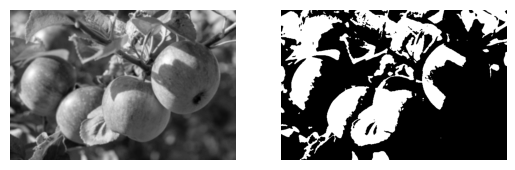

In [17]:
## Idea
# - Minimize within class variance
# - Maximize between class variance
# https://learnopencv.com/otsu-thresholding-with-opencv/

image_path = 'D:/Onedrive/experiments/experiments/image_processing/five_apples.jpg'

# Read the image in a grayscale mode
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
 
# Apply GaussianBlur to reduce image noise if it is required
image = cv2.GaussianBlur(image, (5, 5), 0)

# Set total number of bins in the histogram
bins_num = 256
 
# Get the image histogram
hist, bin_edges = np.histogram(image, bins=bins_num)
 
# Get normalized histogram if it is required
hist = np.divide(hist.ravel(), hist.max())
 
# Calculate centers of bins
bin_mids = (bin_edges[:-1] + bin_edges[1:]) / 2.
 
# Iterate over all thresholds (indices) and get the probabilities w1(t), w2(t)
weight1 = np.cumsum(hist)
weight2 = np.cumsum(hist[::-1])[::-1]
 
# Get the class means mu0(t)
mean1 = np.cumsum(hist * bin_mids) / weight1
# Get the class means mu1(t)
mean2 = (np.cumsum((hist * bin_mids)[::-1]) / weight2[::-1])[::-1]
 
inter_class_variance = weight1[:-1] * weight2[1:] * (mean1[:-1] - mean2[1:]) ** 2
 
# Maximize the inter_class_variance function val
index_of_max_val = np.argmax(inter_class_variance)
 
threshold = bin_mids[:-1][index_of_max_val]
print("Otsu's algorithm implementation thresholding result: ", threshold)

otsu_threshold, image_result = cv2.threshold(
    image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU,
)
print("Obtained threshold: ", otsu_threshold)

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.axis(False)

plt.subplot(1, 2, 2)
plt.imshow(image_result, cmap='gray')
plt.axis(False)

## Inferences
# - Doesn't work well for images that don't have bimodal histogram

Gaussian Blur

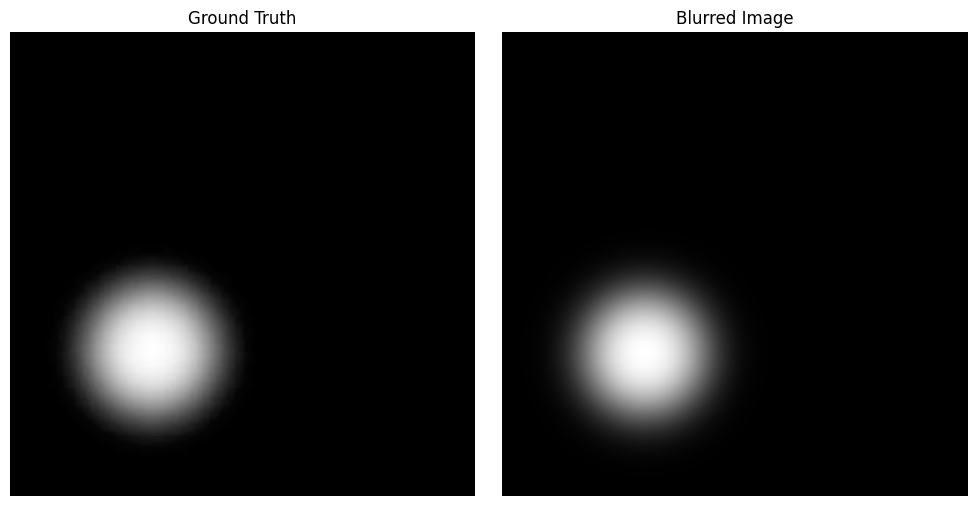

In [49]:
import cv2
import matplotlib.pyplot as plt

# File paths
image_path = 'D:/Onedrive/experiments/experiments/image_processing/white_circle.png'
ground_truth_path = 'D:/Onedrive/experiments/experiments/image_processing/white_circle_blurred_gt.png'

# Read the images
gt = cv2.imread(ground_truth_path, cv2.IMREAD_GRAYSCALE) 
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Apply Gaussian Blur
k = 275  # Kernel size
image_blur = cv2.GaussianBlur(image, (k, k), 0)

# Plot ground truth and blurred image
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Ground Truth")
plt.imshow(gt, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Blurred Image")
plt.imshow(image_blur, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


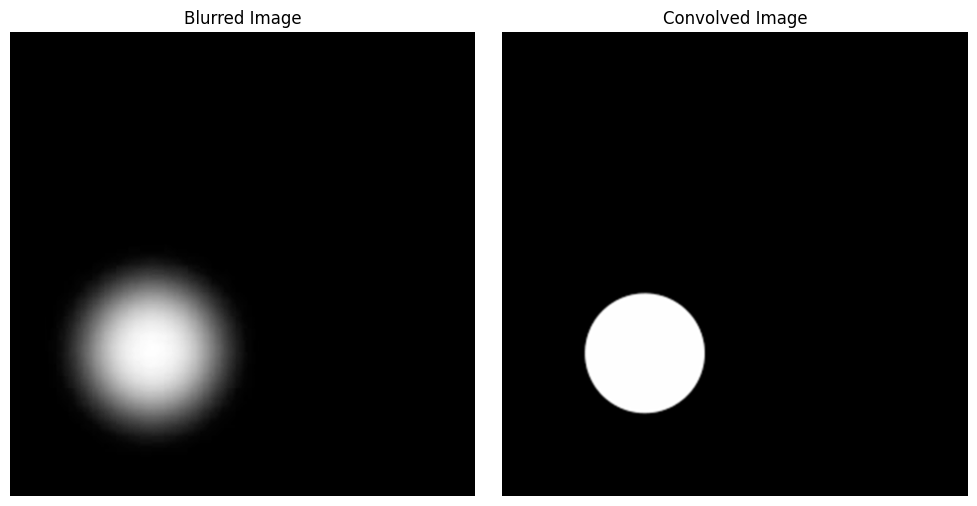

In [50]:

image_path = 'D:/Onedrive/experiments/experiments/image_processing/white_circle.png'
ground_truth = 'D:/Onedrive/experiments/experiments/image_processing/white_circle_blurred_gt.png'
gt = cv2.imread(ground_truth, cv2.IMREAD_GRAYSCALE) 
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Define a kernel (e.g., 3x3 rectangular kernel)
kernel = np.array([[1, 1, 1],
                   [1, 1, 1],
                   [1, 1, 1]], dtype=np.float32)

# Normalize the kernel if needed (optional)
kernel = kernel / np.sum(kernel)

convolved_image = cv2.filter2D(image, ddepth=-1, kernel=kernel)

# Plot the original binary image and the convolved result
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Blurred Image")
plt.imshow(gt, cmap="gray")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Convolved Image")
plt.imshow(convolved_image, cmap="gray")
plt.axis("off")

plt.tight_layout()
plt.show()

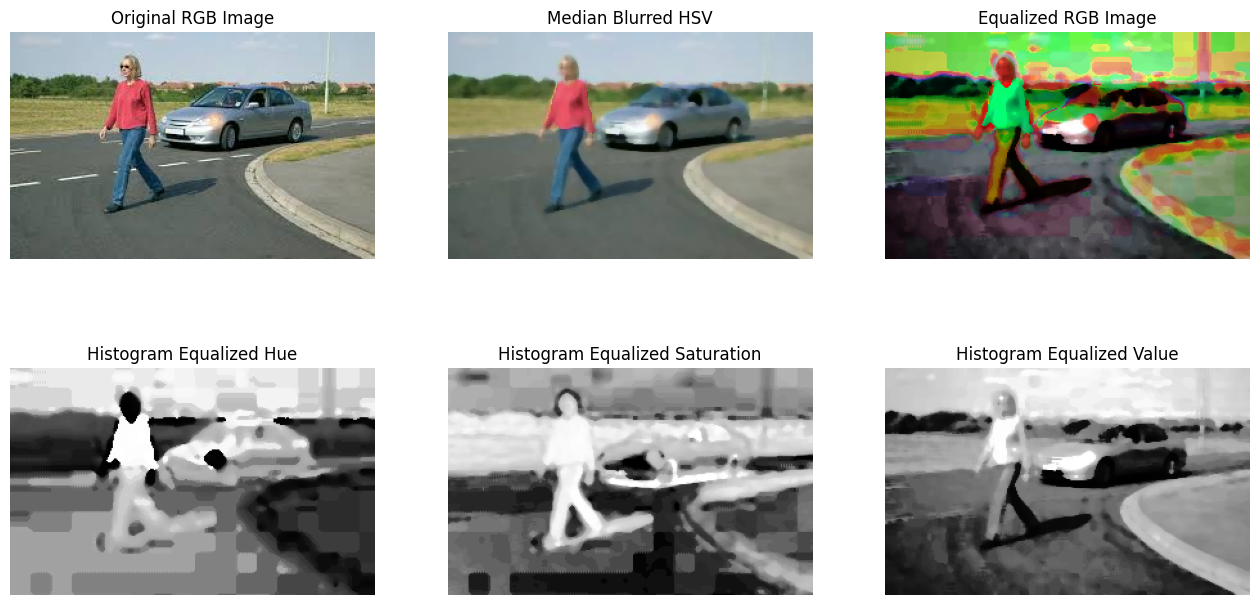

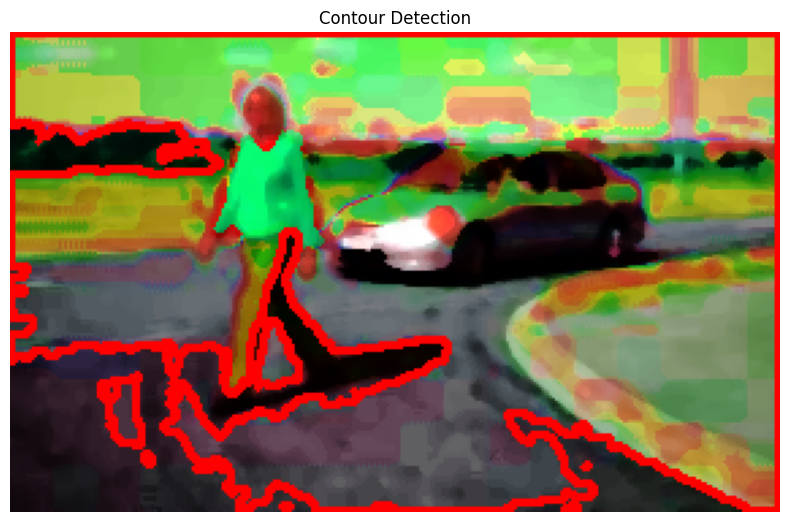

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load the image
image_path = 'D:/Onedrive/Masters/UWE/Study/Term 1/Machine Vision/vehicle_pedestrian.jpg'  # Replace with your image path
image = cv2.imread(image_path)

# Check if the image was loaded successfully
if image is None:
    raise FileNotFoundError(f"Image not found at the path: {image_path}")

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for matplotlib

# Step 2: Convert RGB to HSV
image_hsv = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2HSV)

# Step 3: Apply median blur to the HSV image
median_blurred_hsv = cv2.medianBlur(image_hsv, 5)  # Applying median blur with a 5x5 kernel

# Step 4: Apply Histogram Equalization on all channels of the median-blurred HSV image
# Split the channels
h, s, v = cv2.split(median_blurred_hsv)

# Apply histogram equalization to each channel
h_equalized = cv2.equalizeHist(h)
s_equalized = cv2.equalizeHist(s)
v_equalized = cv2.equalizeHist(v)

# Merge the channels back to create an equalized HSV image
equalized_hsv = cv2.merge((h_equalized, s_equalized, v_equalized))

# Convert the equalized HSV image back to RGB for visualization
equalized_rgb = cv2.cvtColor(equalized_hsv, cv2.COLOR_HSV2RGB)

# Step 5: Contour detection
# Convert the equalized RGB image to grayscale
equalized_gray = cv2.cvtColor(equalized_rgb, cv2.COLOR_RGB2GRAY)

# Threshold the grayscale image to create a binary image
_, binary_image = cv2.threshold(equalized_gray, 50, 255, cv2.THRESH_BINARY)

# Find contours in the binary image
contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw contours on the RGB image
contour_image = equalized_rgb.copy()
cv2.drawContours(contour_image, contours, -1, (255, 0, 0), 2)  # Draw blue contours

# Step 6: Plot the results
plt.figure(figsize=(16, 8))

# Original RGB Image
plt.subplot(2, 3, 1)
plt.title("Original RGB Image")
plt.imshow(image_rgb)
plt.axis("off")

# Median Blurred HSV Image
plt.subplot(2, 3, 2)
plt.title("Median Blurred HSV")
plt.imshow(cv2.cvtColor(median_blurred_hsv, cv2.COLOR_HSV2RGB))  # Convert to RGB for matplotlib
plt.axis("off")

# Histogram Equalized Hue
plt.subplot(2, 3, 4)
plt.title("Histogram Equalized Hue")
plt.imshow(h_equalized, cmap="gray")
plt.axis("off")

# Histogram Equalized Saturation
plt.subplot(2, 3, 5)
plt.title("Histogram Equalized Saturation")
plt.imshow(s_equalized, cmap="gray")
plt.axis("off")

# Histogram Equalized Value
plt.subplot(2, 3, 6)
plt.title("Histogram Equalized Value")
plt.imshow(v_equalized, cmap="gray")
plt.axis("off")

# Final Equalized RGB Image
plt.subplot(2, 3, 3)
plt.title("Equalized RGB Image")
plt.imshow(equalized_rgb)
plt.axis("off")

# Contour Detection Result
plt.figure(figsize=(8, 8))
plt.title("Contour Detection")
plt.imshow(contour_image)
plt.axis("off")

plt.tight_layout()
plt.show()
